### 01 FCGS 对I帧压缩

In [1]:
import os

lmbda_list = [4e-4]
scene = 'cook_spinach-3-ori'
path_to_ply = f'/SDD_D/zwk/output/{scene}/additional_3dgs'
path_to_save = f'/SDD_D/zwk/output/{scene}/additional_3dgs_c'

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

for lmbda in lmbda_list:
    # for ply in os.listdir(path_to_ply):
    #     os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from {path_to_ply}/{ply} --bit_path_to {path_to_save}/{ply.split(".")[0]} --determ 1')
    # os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from {path_to_ply} --bit_path_to {path_to_save} --determ 1')
    # os.system(f'python decode_single_scene_validate.py --gpu 0 --lmd {lmbda} --bit_path_from ./outputs/{exp_name}/{scene} --ply_path_to {path_to_ply}/{scene}/point_cloud/iteration_1000/point_cloud.ply --source_path ../data_static/mipnerf360/{scene}')

    # os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from "/SDD_D/zwk/output/{scene}/init_3dgs.ply" --bit_path_to "/SDD_D/zwk/output/{scene}/init_3dgs_c" --determ 1')
    os.system(f'python -W ignore decode_single_scene_validate.py --gpu 0 --lmd {lmbda} --bit_path_from /SDD_D/zwk/output/{scene}/init_3dgs_c --ply_path_to /SDD_D/zwk/output/{scene}/init_3dgs.ply --source_path /SDD_D/zwk/data_dynamic/dynerf/{scene.split("-")[0]}/frame000000')



Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene_validate.py", line 19, in <module>
    lpips_fn = lpips.LPIPS(net='vgg').to('cuda')
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/lpips.py", line 84, in __init__
    self.net = net_type(pretrained=not self.pnet_rand, requires_grad=self.pnet_tune)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/pretrained_networks.py", line 99, in __init__
    vgg_pretrained_features = tv.vgg16(pretrained=pretrained).features
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py", line 142, in wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packag

In [18]:
import os

lmbda_list = [1e-4]
exp_name = '3DGS_ori_mip360'
path_to_ply = '../gaussian-splatting/output/mipnerf360'
scene_list = os.listdir(path_to_ply)
for lmbda in lmbda_list:
    for scene in ['garden']:
        print('-'*100,'\n', scene)
        os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from {path_to_ply}/{scene}/point_cloud/iteration_30000/point_cloud.ply --bit_path_to ./outputs/{exp_name}/{scene} --determ 1')
        os.system(f'python -W ignore decode_single_scene.py --gpu 3 --lmd {lmbda} --bit_path_from ./outputs/{exp_name}/{scene} --ply_path_to {path_to_ply}/{scene}/point_cloud/iteration_30000/point_cloud.ply ')

---------------------------------------------------------------------------------------------------- 
 garden
Start compressing xyz...
N_g: 1000000
g_fea_enc_q_hyp: tensor([[ 0.1344,  0.0402, -0.0148,  ..., -0.0757,  0.1325,  0.1073],
        [ 0.1347,  0.0402, -0.0145,  ..., -0.0758,  0.1334,  0.1075],
        [ 0.1348,  0.0402, -0.0145,  ..., -0.0758,  0.1333,  0.1074],
        ...,
        [ 0.1345,  0.0402, -0.0148,  ..., -0.0757,  0.1326,  0.1073],
        [ 0.1346,  0.0401, -0.0146,  ..., -0.0758,  0.1331,  0.1074],
        [ 0.1344,  0.0402, -0.0148,  ..., -0.0757,  0.1325,  0.1073]],
       device='cuda:3')
g_fea_enc_q_hyp_q: tensor([[0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.]], device='cuda:3')
Start compressing fea...
Start compressing feq...
fe_q_hyp: tensor([[-0.183

Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/encode_single_scene.py", line 72, in <module>
    train(args)
  File "/SSD2/chenzx/Projects/FCGS/encode_single_scene.py", line 52, in train
    ttl_size += CM.compress(g_xyz_in, g_fea_in, root_path=bit_save_path, chunk_size_list=chunk_size_list, determ_codec=args.determ)[3]
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/FCGS_model.py", line 822, in compress
    bits_feq_main_tmp = encoder_gaussian_mixed_chunk(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 191, in encoder_gaussian_mixed_chunk
    bit_len = encoder_gaussian_mixed(
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 216, in encoder_gaussian_mixed
    lower = arithmetic.calculate_cdf(
            ^^^^^^^^^^

Start decompressing xyz...
Start decompressing fea...
g_fea_enc_q_hyp_q: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:3')
Start decompressing feq...
fe_q_hyp_q: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:3')
Start decompressing geo...
geo_q_hyp_q: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:3')
Start decompressing xyz...
Start de

Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene.py", line 65, in <module>
    train(args)
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene.py", line 32, in train
    g_xyz_out, g_fea_out = CM.decomprss(root_path=bit_save_path, chunk_size_list=chunk_size_list)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/FCGS_model.py", line 1041, in decomprss
    fe_q_tmp = decoder_gaussian_mixed_chunk(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 264, in decoder_gaussian_mixed_chunk
    x_c = decoder_gaussian_mixed(
          ^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 283, in decoder_gaussian_mixed
    with open(file_name, 'rb') as fin:
         ^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: './outputs/3DGS_ori_mip360/ga

### 02 EXP ON FCGS_D

In [ ]:
# joint gof
import os
scene_list = ['flame_steak']
lambda_size_list = [1e-2]


for lambda_size in lambda_size_list:
    model_path = f'./3DGStream-Res/dynerf/all_scenes-{lambda_size}-joint-stepping-0403-tmp'
    checkpoint_path = f'{model_path}/.pth'
    script = f"python train_fcgsd.py --gpu 1 --eval --use_gof  --dynamicGS_type 3dgstream_implicit \
        --Q_y 1 --Q_z 1 --lr 1e-3 --lambda_size {lambda_size}  --residual_num 0\
        --conduct_compress --conduct_decompress --use_scenes\
        --frame_start 0 --frame_end 30 --test_frame_start 1 --test_frame_end 10 --gof_size 5 \
        --images images --iterations 3000 --model_path {model_path} --use_first_as_test --dataset dynerf\
        --scene_list {' '.join(scene_list)}\
        "
    os.system(script)

2025-03-31 15:34:05,305 - train - INFO - Training arguments:
2025-03-31 15:34:05,306 - train - INFO - {
  "sh_degree": 3,
  "source_path": "",
  "model_path": "./3DGStream-Res/dynerf/all_scenes-0.01-joint-stepping-0326",
  "images": "images",
  "resolution": -1,
  "white_background": false,
  "data_device": "cuda",
  "eval": true,
  "lod": 0,
  "iterations": 3000,
  "position_lr_init": 0.00016,
  "position_lr_final": 1.6e-06,
  "position_lr_delay_mult": 0.01,
  "position_lr_max_steps": 30000,
  "feature_lr": 0.0025,
  "opacity_lr": 0.05,
  "scaling_lr": 0.005,
  "rotation_lr": 0.001,
  "percent_dense": 0.01,
  "lambda_dssim": 0.2,
  "densification_interval": 100,
  "opacity_reset_interval": 3000,
  "densify_from_iter": 500,
  "densify_until_iter": 15000,
  "densify_grad_threshold": 0.0002,
  "random_background": false,
  "convert_SHs_python": false,
  "compute_cov3D_python": false,
  "debug": false,
  "Q_y": 1.0,
  "Q_z": 1.0,
  "gof_size": 5,
  "gaussian_feature_dim": 56,
  "motion_di

In [32]:
date = '0408'
import os
# lambda_size_list = [1e-3,  5e-3, 1e-4, 1e-5, 1e-2]
lambda_size_list = [ 5e-3]
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# scene_list = os.listdir('./output_gt/meetroom')
# scene_list = ['trimming', 'vrheadset', 'stepin']
# for lambda_size in lambda_size_list:
#     model_path = f'./3DGStream-Res/{date}-{lambda_size}-gof-exp0'
#     checkpoint_path = f'{model_path}/.pth'
#     script = f"python train_fcgsd.py --gpu 1 --eval --use_scenes --use_gof  --dynamicGS_type control_point \
#         --Q_y 1 --Q_z 1 --lr 1e-3 --lambda_size {lambda_size}  --residual_num 1 --motion_limit 2\
#         --frame_start 1 --frame_end 60 --test_frame_start 20 --test_frame_end 300 --gof_size 5 --iterations 2000\
#         --conduct_training  \
#         --images images  --model_path {model_path} --use_first_as_test \
#         --scene_list {' '.join(scene_list)} --dataset meetroom --knn_num 30 --downsample_rate 70\
#         "
#     os.system(script)

# samlpe test
# scene_list = ['cut_roasted_beef']
# scene_list = ['coffee_martini', 'flame_steak']
scene_list = ['sear_steak-5', 'cut_roasted_beef', 'flame_salmon_1', 'cook_spinach']
for lambda_size in lambda_size_list:
    model_path = f'./3DGStream-Res/{date}-{lambda_size}-gof-exp0'
    # checkpoint_path = f'{model_path}/.pth'
    script = f"python train_fcgsd.py --gpu 1 --eval --use_scenes --use_gof  --dynamicGS_type control_point\
        --Q_y 1 --Q_z 1 --lr 1e-3 --lambda_size {lambda_size}  --residual_num 1 --motion_limit 2\
        --frame_start 1 --frame_end 300 --test_frame_start 1 --test_frame_end 2 --gof_size 20  --iterations 1000\
        --conduct_compress --conduct_decompress \
        --images images --model_path {model_path} --use_first_as_test \
        --scene_list {' '.join(scene_list)} --dataset dynerf --knn_num 30 --downsample_rate 70\
        "
    os.system(script)



2025-04-10 17:27:48,785 - train - INFO - Training arguments:
2025-04-10 17:27:48,785 - train - INFO - {
  "sh_degree": 3,
  "source_path": "",
  "model_path": "./3DGStream-Res/0408-0.005-gof-exp0",
  "images": "images",
  "resolution": -1,
  "white_background": false,
  "data_device": "cuda",
  "eval": true,
  "lod": 0,
  "iterations": 1000,
  "position_lr_init": 0.00016,
  "position_lr_final": 1.6e-06,
  "position_lr_delay_mult": 0.01,
  "position_lr_max_steps": 30000,
  "feature_lr": 0.0025,
  "opacity_lr": 0.05,
  "scaling_lr": 0.005,
  "rotation_lr": 0.001,
  "percent_dense": 0.01,
  "lambda_dssim": 0.2,
  "densification_interval": 100,
  "opacity_reset_interval": 3000,
  "densify_from_iter": 500,
  "densify_until_iter": 15000,
  "densify_grad_threshold": 0.0002,
  "random_background": false,
  "convert_SHs_python": false,
  "compute_cov3D_python": false,
  "debug": false,
  "Q_y": 1.0,
  "Q_z": 1.0,
  "gof_size": 20,
  "gaussian_feature_dim": 56,
  "motion_dim": 7,
  "hidden_dim":

1
/SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/sear_steak-5/frame000000/point_cloud/iteration_4000/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/sear_steak-5/frame000001/point_cloud/iteration_150/point_cloud.ply
sampled_cur_xyz:  tensor([[   9.8060,   -2.2805,   17.9980],
        [-125.7747,   11.3596,   39.7347],
        [ -32.5053,  -20.6232,   16.9578],
        ...,
        [  16.5310,   -8.2391,   10.6092],
        [ -15.9627,    1.8392,    9.3424],
        [  -5.8807,    8.6214,    9.1746]], device='cuda:1')
sampled_nxt_xyz:  tensor([[   9.8072,   -2.2830,   18.0018],
        [-125.7756,   11.3587,   39.7381],
        [ -32.5043,  -20.6244,   16.9589],
        ...,
        [  12.1146,    4.9306,    6.7932],
        [  -7.3644,    0.1600,   18.0546],
        [  -3.8649,    1.2013,   16.8968]], device='cuda:1')
sampled_cur_rot:  tensor([[ 0.0796, -0.4449, -0.5590, -0.4451],
        [-0.1633, -0.4528, -0.7033, -0.7033],
        [ 0.0533, -0.3612, -0.2747, 

2025-04-10 17:27:54,769 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.0013513565063476562, 'bits_prior_motion': 0.0037593841552734375}
2025-04-10 17:27:54,770 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/sear_steak-5/frame000000/point_cloud/iteration_4000/point_cloud.ply


tensor([[     0, 212786, 153361,  ..., 165722,  88916, 222363]],
       device='cuda:1')
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]], device='cuda:1')
dec_motion:  tensor([[ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.1432, -0.1275,  0.1376,  ..., -0.1058,  0.1918, -0.0848],
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        ...,
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185]],
       device='cuda:1')
tensor(2046., device='cuda:1')
Figure(640x480)
motion_xyz:  tensor([[ 0.0007,  0.0002, -0.0002],
        [ 0.0000,  0.

2025-04-10 17:27:58,951 - train - INFO - Starting validation...
/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]
2025-04-10 17:28:01,196 - train - INFO - Evaluation results: PSNR: 34.0385, SSIM: 0.9609, LPIPS: 0.1213, L1: 0.0146,
2025-04-10 17:28:01,199 - train - INFO - Compressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/cut_roasted_beef/frame000000/point_cloud/iteration_4000/point_cloud.ply


1
/SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/cut_roasted_beef/frame000000/point_cloud/iteration_4000/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/cut_roasted_beef/frame000001/point_cloud/iteration_150/point_cloud.ply
sampled_cur_xyz:  tensor([[  10.5163,   -1.2364,   17.4604],
        [-514.6955, -357.3180,  147.8199],
        [ -44.7380, -377.0533,  293.8200],
        ...,
        [   2.4377,    5.2323,   15.9038],
        [  22.6005,   -6.8440,    9.6469],
        [  -9.5104,   -8.8127,   13.7294]], device='cuda:1')
sampled_nxt_xyz:  tensor([[  10.5156,   -1.2373,   17.4593],
        [-514.6974, -357.3192,  147.8158],
        [ -44.7428, -377.0524,  293.8208],
        ...,
        [ -14.4735,    7.0273,   14.6935],
        [  13.5215,   -6.1415,    8.9551],
        [  -3.0111,    6.9425,   22.9756]], device='cuda:1')
sampled_cur_rot:  tensor([[ 0.0596, -0.4256, -0.5585, -0.4867],
        [-0.1309, -0.4508, -0.7119, -0.7069],
        [-0.1065, -0.5113, -

2025-04-10 17:28:03,677 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.0006732940673828125, 'bits_prior_motion': 0.0020246505737304688}
2025-04-10 17:28:03,679 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/cut_roasted_beef/frame000000/point_cloud/iteration_4000/point_cloud.ply


tensor([[     0,  61875,  79767,  ...,  60383, 145982,  28121]],
       device='cuda:1')
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  ...,  0.,  0., -1.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]], device='cuda:1')
dec_motion:  tensor([[ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [-0.1006,  0.1134, -0.0271,  ..., -0.0158, -0.0312,  0.1210],
        ...,
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185]],
       device='cuda:1')
tensor(884., device='cuda:1')
Figure(640x480)
motion_xyz:  tensor([[ 0.0007,  0.0002, -0.0003],
        [ 0.0000,  0.0

2025-04-10 17:28:05,827 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]
2025-04-10 17:28:07,868 - train - INFO - Evaluation results: PSNR: 34.1570, SSIM: 0.9655, LPIPS: 0.1122, L1: 0.0136,
2025-04-10 17:28:07,871 - train - INFO - Compressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_salmon_1/frame000000/point_cloud/iteration_4000/point_cloud.ply


1
/SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_salmon_1/frame000000/point_cloud/iteration_4000/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/flame_salmon_1/frame000001/point_cloud/iteration_150/point_cloud.ply
sampled_cur_xyz:  tensor([[  12.5348,   -3.3943,   11.8835],
        [ 393.2365,  -62.4344,   -7.7254],
        [-253.0445,   40.6978,   95.5131],
        ...,
        [ -57.5836,   -2.4738,   55.1859],
        [  12.2222,   24.7139,  111.9987],
        [  54.1182,   -1.1441,    8.5301]], device='cuda:1')
sampled_nxt_xyz:  tensor([[  12.5347,   -3.3928,   11.8813],
        [ 393.2349,  -62.4308,   -7.7219],
        [-253.0477,   40.6992,   95.5092],
        ...,
        [ 312.0916,  -10.5790,   51.2915],
        [ -27.4752,  -11.6311,   86.9546],
        [  -9.7705,    0.8365,   28.5698]], device='cuda:1')
sampled_cur_rot:  tensor([[-0.0418, -0.6920, -0.5228, -0.5604],
        [ 0.0858, -0.3840, -0.4264, -0.4560],
        [-0.3062, -0.4156, -0.88

2025-04-10 17:28:11,771 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.0009670257568359375, 'bits_prior_motion': 0.0030603408813476562}
2025-04-10 17:28:11,772 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/flame_salmon_1/frame000000/point_cloud/iteration_4000/point_cloud.ply


tensor([[     0, 121808,  26359,  ...,  81605,  90451, 220549]],
       device='cuda:1')
y_hat_motion:  tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., -1.,  0.,  0.]], device='cuda:1')
dec_motion:  tensor([[ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        ...,
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.1375, -0.1193,  0.2655,  ..., -0.0998,  0.3012, -0.1686]],
       device='cuda:1')
tensor(1281., device='cuda:1')
Figure(640x480)
motion_xyz:  tensor([[ 0.0007,  0.0002, -0.0003],
        [ 0.0000,  0.

2025-04-10 17:28:15,030 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]
2025-04-10 17:28:17,131 - train - INFO - Evaluation results: PSNR: 29.0078, SSIM: 0.9293, LPIPS: 0.1340, L1: 0.0214,
2025-04-10 17:28:17,133 - train - INFO - Compressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/cook_spinach/frame000000/point_cloud/iteration_4000/point_cloud.ply


1
/SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/cook_spinach/frame000000/point_cloud/iteration_4000/point_cloud.ply
/SSD2/chenzx/Projects/FCGS/output_gt/dynerf/cook_spinach/frame000001/point_cloud/iteration_150/point_cloud.ply
sampled_cur_xyz:  tensor([[ 6.9547e+00, -3.0386e-01,  1.9036e+01],
        [-8.5129e+02,  6.0267e+02, -1.3844e+02],
        [ 6.4052e+02,  7.2780e+01,  3.6720e+02],
        ...,
        [ 7.6262e+00, -8.8541e+00,  1.1491e+01],
        [-2.5204e+01,  6.3515e+00,  2.4695e+00],
        [ 6.2135e+00,  5.2152e+00,  1.1010e+01]], device='cuda:1')
sampled_nxt_xyz:  tensor([[ 6.9572e+00, -3.0477e-01,  1.9038e+01],
        [-8.5129e+02,  6.0267e+02, -1.3844e+02],
        [ 6.4052e+02,  7.2768e+01,  3.6720e+02],
        ...,
        [-2.1603e+00,  2.1519e-01,  1.3190e+01],
        [-1.7162e+01,  1.6778e+00,  7.0058e+00],
        [ 1.1592e+01,  3.3250e+00,  1.0172e+01]], device='cuda:1')
sampled_cur_rot:  tensor([[ 0.0520, -0.3424, -0.5418, -0.4960],
        [-

2025-04-10 17:28:19,555 - train - INFO - Compression Result: {'bits_mask': 0.0, 'bits_motion': 0.0007104873657226562, 'bits_prior_motion': 0.0019626617431640625}
2025-04-10 17:28:19,556 - train - INFO - Decompressing model from /SSD2/chenzx/Projects/Dataset4Compression/init_3dgs/dynerf/cook_spinach/frame000000/point_cloud/iteration_4000/point_cloud.ply


tensor([[     0,  13877,   7533,  ...,  75153, 118212,   6144]],
       device='cuda:1')
y_hat_motion:  tensor([[ 1.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  ...,  0.,  0., -1.],
        [ 1.,  0.,  0.,  ...,  0.,  0., -1.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [-1.,  0.,  0.,  ..., -1., -1.,  1.],
        [ 0., -1.,  0.,  ...,  0., -1.,  0.]], device='cuda:1')
dec_motion:  tensor([[-0.0320, -0.0018, -0.0055,  ...,  0.0023,  0.0148, -0.0109],
        [-0.0977,  0.0413,  0.0083,  ...,  0.0488,  0.0246,  0.0385],
        [-0.0977,  0.0413,  0.0083,  ...,  0.0488,  0.0246,  0.0385],
        ...,
        [ 0.0197,  0.0045, -0.0073,  ..., -0.0162,  0.0132, -0.0185],
        [ 0.3344, -0.0164, -0.3808,  ..., -0.3633,  0.4195, -0.1815],
        [ 0.0169,  0.0326, -0.1477,  ..., -0.0299,  0.0648,  0.0716]],
       device='cuda:1')
tensor(975., device='cuda:1')
Figure(640x480)
motion_xyz:  tensor([[-1.1196e-03, -6.3032e-05, -1.9264e-04],
        [ 

2025-04-10 17:28:21,653 - train - INFO - Starting validation...


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]
2025-04-10 17:28:23,821 - train - INFO - Evaluation results: PSNR: 34.2691, SSIM: 0.9661, LPIPS: 0.1086, L1: 0.0125,


### 03 Result Display

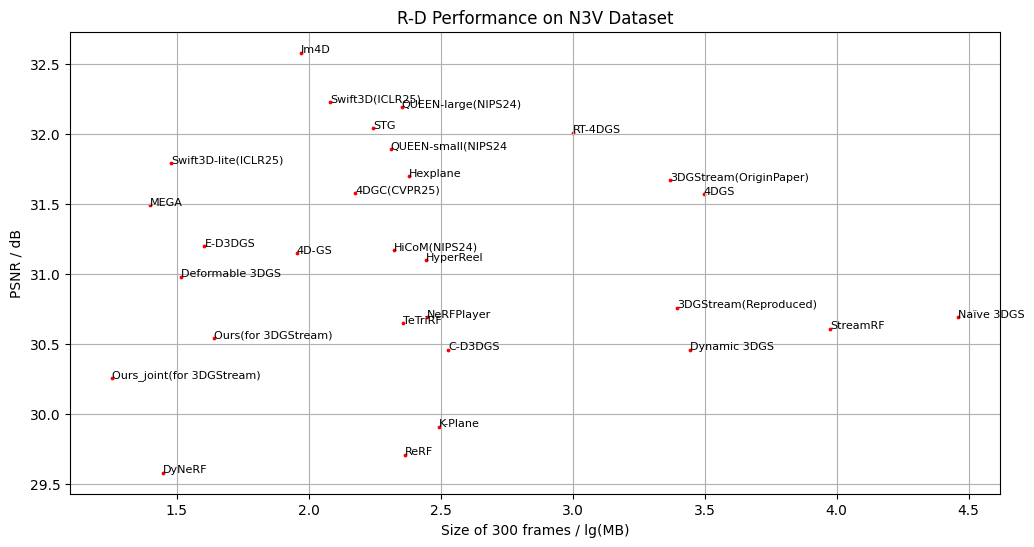

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


res_path = "./benchmark_n3v.json"
with open(res_path, 'r') as f:
    res = json.load(f)
model_names = list(res.keys())
psnr_list = [res[model_name]['PSNR'] for model_name in model_names]
size_list = [np.log10(res[model_name]['SIZE']) for model_name in model_names]

plt.figure(figsize=(12, 6))  # Make figure wider to accommodate legend
plt.scatter(size_list, psnr_list, s=3, color='red')
for i, model_name in enumerate(model_names):
    plt.text(size_list[i], psnr_list[i], model_name, fontsize=8)
plt.xlabel('Size of 300 frames / lg(MB)')
plt.ylabel('PSNR / dB')
# add grid
plt.grid(True)
plt.title('R-D Performance on N3V Dataset')
plt.show()




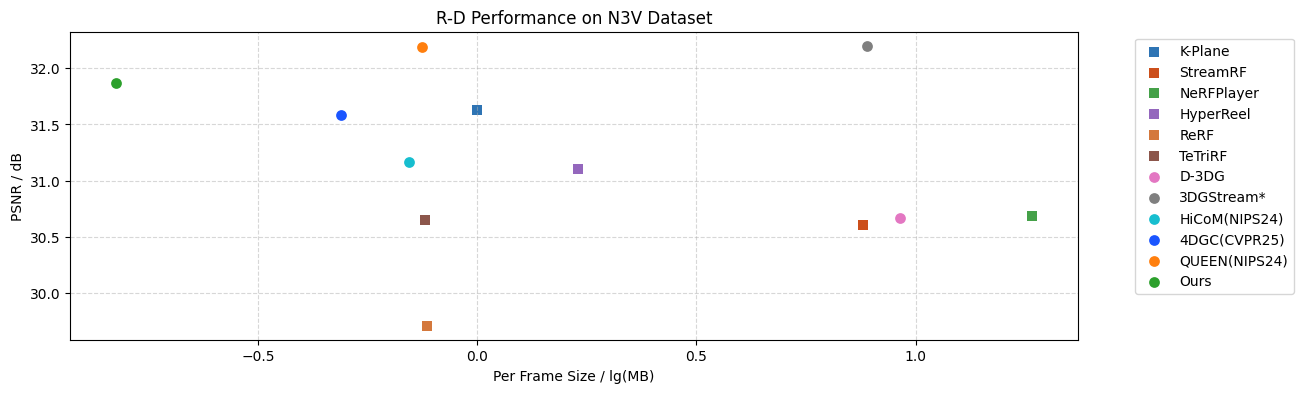

In [65]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


res_path = "./benchmark_n3v_paper.json"
with open(res_path, 'r') as f:
    res = json.load(f)
model_names = list(res.keys())
psnr_list = [res[model_name]['PSNR'] for model_name in model_names]
size_list = [np.log10(res[model_name]['SIZE']) for model_name in model_names]

plt.figure(figsize=(13, 4), dpi=100)  # Make figure wider to accommodate legend
colors = ['#2E74B4', '#CC4F1B', '#45A149', '#9467BD', '#D4783C', '#8C564B',
          '#E377C2', '#7F7F7F', '#17BECF', '#1A55FF', '#FF7F0E', '#2CA02C']
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', 'h', '8', '*', 'H']
markers = ['s'] * 6 + ['o'] * 6
for i, (name, psnr, size) in enumerate(zip(model_names, psnr_list, size_list)):
    plt.scatter(size, psnr, s=60, color=colors[i], marker=markers[i], 
                label=name, alpha=1, edgecolors='white', linewidth=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# for i, model_name in enumerate(model_names):
#     plt.text(size_list[i], psnr_list[i], model_name, fontsize=10)
plt.xlabel('Per Frame Size / lg(MB)')
plt.ylabel('PSNR / dB')
# add grid
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('R-D Performance on N3V Dataset')
plt.show()


